In [62]:
import time
import sys
sys.path.append('../')

import pickle
import random
import matplotlib.pyplot as plt
import numpy as np

import operators

from operators import l1_prox, l2_prox, norm1, norm2sq
from plot_utils import plot_convergence, plot_digit_features
from algorithms import fista, ista, prox_sg
from utils import *

RAND_SEED = 666013

def call_all_methods(fx, gx, gradfx, stocgradfx, prox_fc, params):
    all_results = dict()

    params['maxit'] = params['maxit_determ']
    all_results['ISTA'] = ista(fx, gx, gradfx, prox_fc, params)

    params['restart_fista'] = False
    all_results['FISTA'] = fista(fx, gx, gradfx, prox_fc, params)

    params['restart_fista'] = True
    all_results['FISTA-RESTART'] = fista(fx, gx, gradfx, prox_fc, params)

    params['maxit'] = params['maxit_stoch']
    all_results['PROX-SG'] = prox_sg(fx, gx, stocgradfx, prox_fc, params)

    return all_results

In [63]:
    random.seed(RAND_SEED)
    np.random.seed(RAND_SEED)

    A_train, b_train, b_train_binarized, A_test, b_test, num_classes, num_features = load_mnist()
    lmbd_l1 = 1.0
    lmbd_l2 = 10.0

    fx = lambda Y: operators.fx(Y, A_train, b_train)
    gradfx = lambda Y: operators.gradfx(Y, A_train, b_train_binarized)
    stocgradfx = lambda Y, minimabtch_size: operators.stocgradfx(Y, minimabtch_size, A_train, b_train_binarized)

    Lips = operators.norm2sq(A_train)
#     np.linalg.norm(A_train, 'fro')**2 / 2
    ############## YOUR CODES HERE ##############

    f_star_l1, X_opt_l1, f_star_l2, X_opt_l2 = read_f_star(fx, lmbd_l1, lmbd_l2)

    params = {
        'maxit_determ': 2000,
        'maxit_stoch': 50000,
        'maxit': None,
        'Lips':  Lips,
        'lambda': None,
        'x0': np.random.rand(num_features, num_classes),
        'restart_fista': False,
        'iter_print': 100,
        'verbose': True,
        'minib_size': 100,
        'stoch_rate_regime': lambda k: 1/(Lips + k**(0.55)),
        'n': A_train.shape[0]
    }
    epoch_to_iteration_exchange_rate = int(params['n']/params['minib_size'])
    print(Lips)


----- MNIST datasets loaded: 5000 training samples and 10000 test samples.
220731.46561321933


In [13]:
    params['lambda'] = lmbd_l1
    all_results_l1 = call_all_methods(fx, operators.norm1, gradfx, stocgradfx, operators.l1_prox, params)

    params['lambda'] = lmbd_l2
    all_results_l2 = call_all_methods(fx, operators.norm2sq, gradfx, stocgradfx, operators.l2_prox, params)





---------- Optimization with ISTA started.



--- iter = 0/2000, F(X) = 23186.111541, f(X) = 19310.962478, g(X) = 3875.149063.

--- iter = 100/2000, F(X) = 12642.263591, f(X) = 8769.516662, g(X) = 3872.746929.

--- iter = 200/2000, F(X) = 10036.021711, f(X) = 6165.259828, g(X) = 3870.761883.

--- iter = 300/2000, F(X) = 8838.148650, f(X) = 4969.521155, g(X) = 3868.627495.

--- iter = 400/2000, F(X) = 8155.049521, f(X) = 4288.772321, g(X) = 3866.277200.

--- iter = 500/2000, F(X) = 7710.247418, f(X) = 3846.549914, g(X) = 3863.697504.

--- iter = 600/2000, F(X) = 7394.204613, f(X) = 3533.185951, g(X) = 3861.018662.

--- iter = 700/2000, F(X) = 7155.619684, f(X) = 3297.360507, g(X) = 3858.259177.

--- iter = 800/2000, F(X) = 6967.579105, f(X) = 3112.120227, g(X) = 3855.458878.

--- iter = 900/2000, F(X) = 6814.568912, f(X) = 2961.926923, g(X) = 3852.641989.

--- iter = 1000/2000, F(X) = 6686.875089, f(X) = 2837.104421, g(X) = 3849.770668.

--- iter = 1100/2000, F(X) = 6578.212794, f(X)

In [14]:
%store all_results_l1

Stored 'all_results_l1' (dict)


In [15]:
%store all_results_l2

Stored 'all_results_l2' (dict)


In [5]:
%store -r

Unable to restore variable 'reddit_join', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>
Unable to restore variable 'reddit_scores', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>
Unable to restore variable 'reddit_words_filtered', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>
Unable to restore variable 'subreddit_words', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


In [55]:
l1 = all_results_l1
l1

{'ISTA': {'X_final': 6014.829883462438,
  'conv': array([23186.11154087, 22753.65407917, 22366.55448372, ...,
          6015.2345618 ,  6014.82988346,  6014.82988346])},
 'FISTA': {'X_final': 1516.0886351049112,
  'conv': array([23186.11154087, 22753.65407917, 22261.21099301, ...,
          1516.29599551,  1516.0886351 ,  1516.0886351 ])},
 'FISTA-RESTART': {'X_final': 1446.7518529851513,
  'conv': array([23186.11154087, 22753.65407917, 22261.21099301, ...,
          1446.87515506,  1446.75185299,  1446.75185299])},
 'PROX-SG': {'X_final': 7498.381995376339,
  'conv': array([23208.4287432 , 22755.83680101, 22360.75859004, ...,
          7498.4488425 ,  7498.38199538,  7498.38199538])}}

In [58]:
%store l1

Stored 'l1' (dict)


In [46]:
l1['PROX-SG']['conv'][50000] = l1['PROX-SG']['conv'][49999]

In [51]:
l2 = all_results_l2
l2

{'ISTA': {'X_final': 12894.596854341093,
  'conv': array([32145.67556825, 31710.91198426, 31321.55628919, ...,
         12895.91109629, 12894.59685434, 12894.59685434])},
 'FISTA': {'X_final': 1626.7401052619396,
  'conv': array([32145.67556825, 31710.91198426, 31215.58297676, ...,
          1626.71551659,  1626.74010526,  1626.74010526])},
 'FISTA-RESTART': {'X_final': 1625.9965011451186,
  'conv': array([32145.67556825, 31710.91198426, 31215.58297676, ...,
          1625.99650208,  1625.99650115,  1625.99650115])},
 'PROX-SG': {'X_final': 4336.976765868483,
  'conv': array([32079.60577083, 31644.4176781 , 31241.37367041, ...,
          4337.04304859,  4336.97676587,  4336.97676587])}}

In [59]:
%store l2

Stored 'l2' (dict)


In [54]:
l1['FISTA-RESTART']['conv'][2000] = l1['FISTA-RESTART']['conv'][1999]

In [31]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

def plot_convergence2(results, fs_star, epoch_to_iteration_exchange_rate, title):
    colors = { 'ISTA': 'red', 'FISTA': 'blue', 'FISTA-RESTART': 'green', 'PROX-SG': 'magenta'}
    # DETERM
    ax1 = plt.subplot(1, 2, 1)
    for key in ['ISTA', 'FISTA', 'FISTA-RESTART']:
        if key in results:
            num_iterations = len(results[key]['conv'])
            ax1.plot(np.array(range(0, num_iterations)), abs(results[key]['conv'] - fs_star) / fs_star,
                                                                color=colors[key], lw=2, label=key)
    ax1.legend()
    ax1.set_xlabel('#iterations')
    ax1.set_ylabel(r'$ |f(\mathbf{x}^k) - f^\star|  /  f^\star$')
    ax1.set_ylim(1e-8, 1e2)
    ax1.set_yscale('log')
    ax1.grid()

    # STOCHASTIC
    ax2 = plt.subplot(1, 2, 2)
    ticks = []
    locs = []
    for key in ['PROX-SG', 'PROX-SVRG++']:
        if key in results:
            num_iterations = len(results[key]['conv'])
            ax2.plot(np.array(range(0, num_iterations)), abs(results[key]['conv'] - fs_star) / fs_star,
                                                                color=colors[key], lw=2, label=key)
            num_epochs = num_iterations / epoch_to_iteration_exchange_rate
            tick_frec = 50
            tcks = [tick_frec*i for i in range(1, int(num_epochs/tick_frec) + 1)]
            locs = [epoch_to_iteration_exchange_rate*tick_frec*i for i in range(1, int(num_epochs/tick_frec) + 1)]
            plt.xticks(locs, tcks)
    ax2.legend()
    ax2.set_xlabel('#epochs')
    ax2.set_ylabel(r'$ |f(\mathbf{x}^k) - f^\star|  /  f^\star$')
    ax2.set_ylim(1e-2, 1e2)
    ax2.set_yscale('log')
    ax2.set_xticks(locs,ticks)
    ax2.set_xticklabels(locs,rotation=90)
    
    for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(8)
    ax2.grid()
    plt.suptitle(title)
    plt.show()

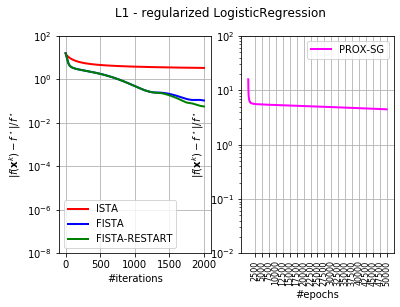

In [57]:
plot_convergence2(l1, f_star_l1, epoch_to_iteration_exchange_rate, 'L1 - regularized LogisticRegression')


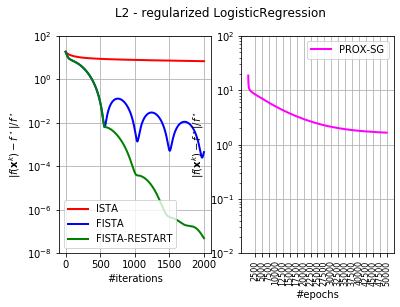

In [56]:
plot_convergence2(l2, f_star_l2, epoch_to_iteration_exchange_rate, 'L2 - regularized LogisticRegression')


In [60]:
l1

{'ISTA': {'X_final': 6014.829883462438,
  'conv': array([23186.11154087, 22753.65407917, 22366.55448372, ...,
          6015.2345618 ,  6014.82988346,  6014.82988346])},
 'FISTA': {'X_final': 1516.0886351049112,
  'conv': array([23186.11154087, 22753.65407917, 22261.21099301, ...,
          1516.29599551,  1516.0886351 ,  1516.0886351 ])},
 'FISTA-RESTART': {'X_final': 1446.7518529851513,
  'conv': array([23186.11154087, 22753.65407917, 22261.21099301, ...,
          1446.87515506,  1446.75185299,  1446.75185299])},
 'PROX-SG': {'X_final': 7498.381995376339,
  'conv': array([23208.4287432 , 22755.83680101, 22360.75859004, ...,
          7498.4488425 ,  7498.38199538,  7498.38199538])}}

In [71]:
x_star_l1=X_opt_l1.reshape((num_classes*num_features),1)

In [72]:
x_star_l2=X_opt_l2.reshape((num_classes*num_features),1)

In [74]:
x0 = params['x0'].reshape((num_classes*num_features),1)

In [78]:
R0_l1 = np.transpose(x0 - x_star_l1)@(x0 - x_star_l1)
R0_l1

array([[3170.30133804]])

In [79]:
R0_l2 = np.transpose(x0 - x_star_l2)@(x0 - x_star_l2)
R0_l2

array([[2656.99313522]])

In [80]:
Lips

220731.46561321933

In [127]:
iteration = np.reshape(np.array(range(0, params['maxit_determ']+1)),(1,2001))
iteration.shape

(1, 2001)

In [133]:
ista_theory = Lips*R0_l1/(2*np.array(range(0, params['maxit_determ']+1))+4)
ista_theory2 = np.reshape(ista_theory,(2001,))

In [134]:
ista_theory2.shape

(2001,)

In [135]:
fista_theory = 2*Lips*R0_l1/(np.array(range(0, params['maxit_determ']+1))+2)**2
fista_theory2=fista_theory.reshape(2001,)

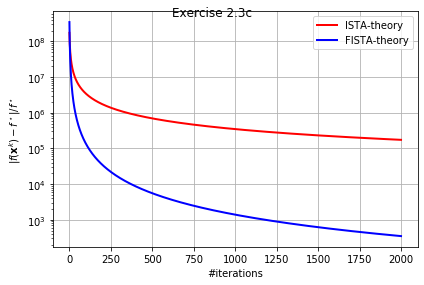

In [137]:
colors = { 'ISTA': 'red', 'FISTA': 'blue'}
# DETERM
fig, ax1 = plt.subplots()
ax1.plot(np.array(range(0, params['maxit_determ']+1)), ista_theory2, color=colors['ISTA'], lw=2, label='ISTA-theory')
ax1.plot(np.array(range(0, params['maxit_determ']+1)), fista_theory2, color=colors['FISTA'], lw=2, label='FISTA-theory')
ax1.legend()
ax1.set_xlabel('#iterations')
ax1.set_ylabel(r'$ |f(\mathbf{x}^k) - f^\star|  /  f^\star$')
# ax1.set_ylim(1e-15, 1e2)
ax1.set_yscale('log')
ax1.grid()
fig.tight_layout() 
plt.suptitle('Exercise 2.3c')
plt.show()

In [138]:
params['n']

5000

In [3]:
params['lambda'] = lmbd_l1
params['restart_fista'] = True
params['maxit'] = params['maxit_determ']
fista_results_l1 = fista(fx, operators.norm1, gradfx, operators.l1_prox, params)




---------- Optimization with FISTA-RESTART started.



--- iter = 0/2000, F(X) = 23186.111541, f(X) = 19800.505979, g(X) = 3875.184582.

--- iter = 100/2000, F(X) = 6129.292636, f(X) = 2285.577883, g(X) = 3844.161659.

--- iter = 200/2000, F(X) = 5256.716374, f(X) = 1529.564438, g(X) = 3727.255468.

--- iter = 300/2000, F(X) = 4745.260384, f(X) = 1212.524946, g(X) = 3532.794370.

--- iter = 400/2000, F(X) = 4294.645950, f(X) = 1020.411769, g(X) = 3274.278919.

--- iter = 500/2000, F(X) = 3853.959175, f(X) = 887.269832, g(X) = 2966.727283.

--- iter = 600/2000, F(X) = 3418.708784, f(X) = 792.152924, g(X) = 2626.589647.

--- iter = 700/2000, F(X) = 3003.339936, f(X) = 726.610129, g(X) = 2276.760381.

--- iter = 800/2000, F(X) = 2624.705690, f(X) = 686.058694, g(X) = 1938.675379.

--- iter = 900/2000, F(X) = 2302.536734, f(X) = 667.466082, g(X) = 1635.097155.

--- iter = 1000/2000, F(X) = 2045.936835, f(X) = 668.163831, g(X) = 1377.798428.

--- iter = 1100/2000, F(X) = 1862.754206, f(X

In [4]:
%store fista_results_l1

Stored 'fista_results_l1' (dict)


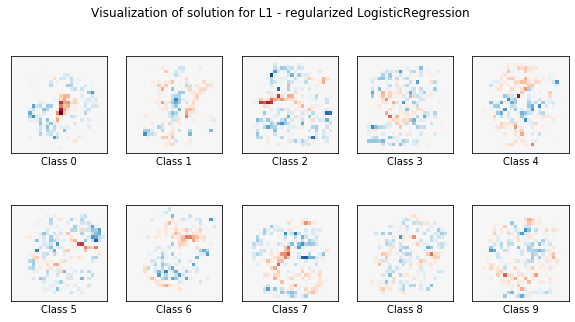

In [5]:
plot_digit_features(fista_results_l1['X_final'], 'Visualization of solution for L1 - regularized LogisticRegression')

In [7]:
print('FISTA-RESTART-l1 accuracy = {:f}%.\n'.format(compute_accuracy(fista_results_l1['X_final'], A_test, b_test) * 100))

FISTA-RESTART-l1 accuracy = 89.200000%.



In [3]:
params['lambda'] = lmbd_l2
params['restart_fista'] = True
params['maxit'] = params['maxit_determ']
fista_results_l2 = fista(fx, operators.norm2sq, gradfx, operators.l2_prox, params)




---------- Optimization with FISTA-RESTART started.



--- iter = 0/2000, F(X) = 32145.675568, f(X) = 19800.505979, g(X) = 1283.711850.

--- iter = 100/2000, F(X) = 13623.731039, f(X) = 2249.451897, g(X) = 1137.570402.

--- iter = 200/2000, F(X) = 9486.834656, f(X) = 1506.919568, g(X) = 798.067183.

--- iter = 300/2000, F(X) = 5550.606508, f(X) = 1264.586345, g(X) = 428.638692.

--- iter = 400/2000, F(X) = 2884.390408, f(X) = 1172.953976, g(X) = 171.155459.

--- iter = 500/2000, F(X) = 1770.808661, f(X) = 1139.432952, g(X) = 63.139062.

--- iter = 600/2000, F(X) = 1636.049550, f(X) = 1136.208017, g(X) = 49.984379.

--- iter = 700/2000, F(X) = 1632.312947, f(X) = 1137.173376, g(X) = 49.514065.

--- iter = 800/2000, F(X) = 1628.621189, f(X) = 1141.060520, g(X) = 48.756105.

--- iter = 900/2000, F(X) = 1626.639803, f(X) = 1146.941591, g(X) = 47.969830.

--- iter = 1000/2000, F(X) = 1626.081164, f(X) = 1152.856735, g(X) = 47.322444.

--- iter = 1100/2000, F(X) = 1626.052958, f(X) = 1154

In [4]:
%store fista_results_l2

Stored 'fista_results_l2' (dict)


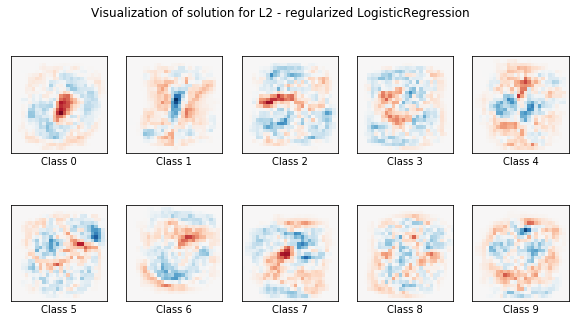

In [5]:
plot_digit_features(fista_results_l2['X_final'], 'Visualization of solution for L2 - regularized LogisticRegression')

In [6]:
print('FISTA-RESTART-l2 accuracy = {:f}%.\n'.format(compute_accuracy(fista_results_l2['X_final'], A_test, b_test) * 100))

FISTA-RESTART-l2 accuracy = 89.890000%.



In [8]:
%run train_and_test_mnist_nn.py


Epoch   0/ 17
	Train loss: 0.865, accuracy: 71.4%
	Test loss:  0.382, accuracy: 88.5%
	Time: 1.88s

Epoch   1/ 17
	Train loss: 0.291, accuracy: 91.5%
	Test loss:  0.290, accuracy: 91.3%
	Time: 1.76s

Epoch   2/ 17
	Train loss: 0.174, accuracy: 94.4%
	Test loss:  0.255, accuracy: 92.4%
	Time: 1.78s

Epoch   3/ 17
	Train loss: 0.133, accuracy: 95.8%
	Test loss:  0.264, accuracy: 92.6%
	Time: 1.77s

Epoch   4/ 17
	Train loss: 0.115, accuracy: 96.1%
	Test loss:  0.295, accuracy: 92.2%
	Time: 1.90s

Epoch   5/ 17
	Train loss: 0.079, accuracy: 97.4%
	Test loss:  0.253, accuracy: 93.4%
	Time: 1.74s

Epoch   6/ 17
	Train loss: 0.050, accuracy: 98.3%
	Test loss:  0.248, accuracy: 94.0%
	Time: 1.94s

Epoch   7/ 17
	Train loss: 0.040, accuracy: 98.6%
	Test loss:  0.326, accuracy: 91.7%
	Time: 1.90s

Epoch   8/ 17
	Train loss: 0.045, accuracy: 98.5%
	Test loss:  0.331, accuracy: 92.8%
	Time: 1.78s

Epoch   9/ 17
	Train loss: 0.035, accuracy: 98.9%
	Test loss:  0.273, accuracy: 94.1%
	Time: 1.76s
